In [10]:
!pip install --upgrade -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn_extra.cluster import KMedoids

In [361]:
df = pd.read_csv('Dados-Tarefa-02.csv', index_col = 'Index', names = ['Index','x','y'], header = 0)
df

,x,y
Index,,
0,1.225160,-0.951731
1,1.016304,-1.725175
2,0.335340,-1.724896
3,1.786348,-1.782653
4,1.016751,1.062569
...,...,...
995,0.929594,-0.743331
996,-0.338431,-0.343315
997,1.542708,-0.055665


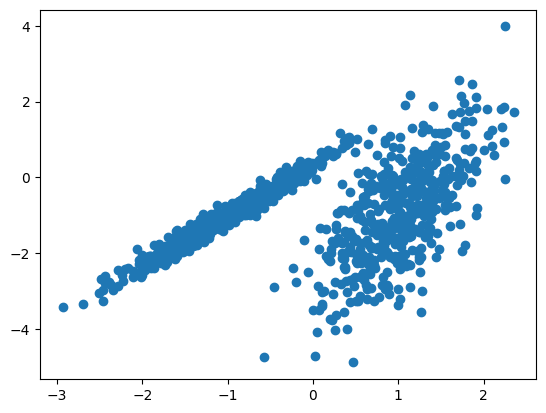

In [362]:
plt.scatter(df['x'],df['y'])

KMEANS

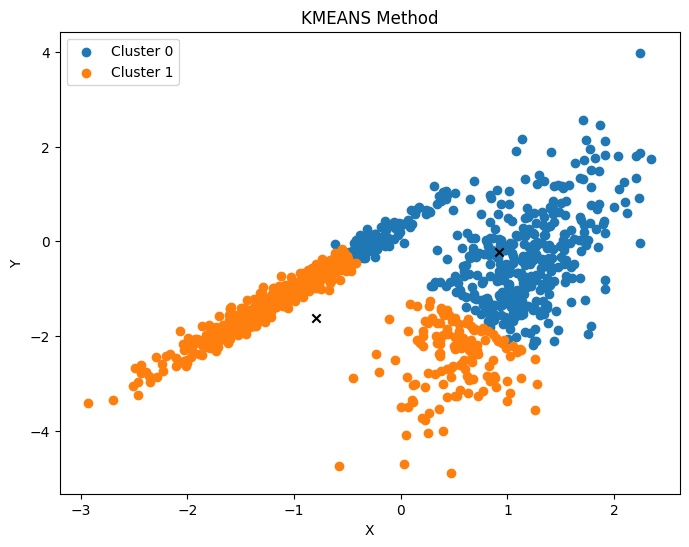

In [363]:
data = df.copy()
k = 2

kmeans = KMeans(n_clusters=k,random_state=0,n_init='auto')
kmeans.fit(data)
data['cluster'] = kmeans.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmeans.labels_):
    row = data.index[kmeans.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0],
                kmeans.cluster_centers_[i][1],
                color='black', marker='x')
    
plt.title('KMEANS Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

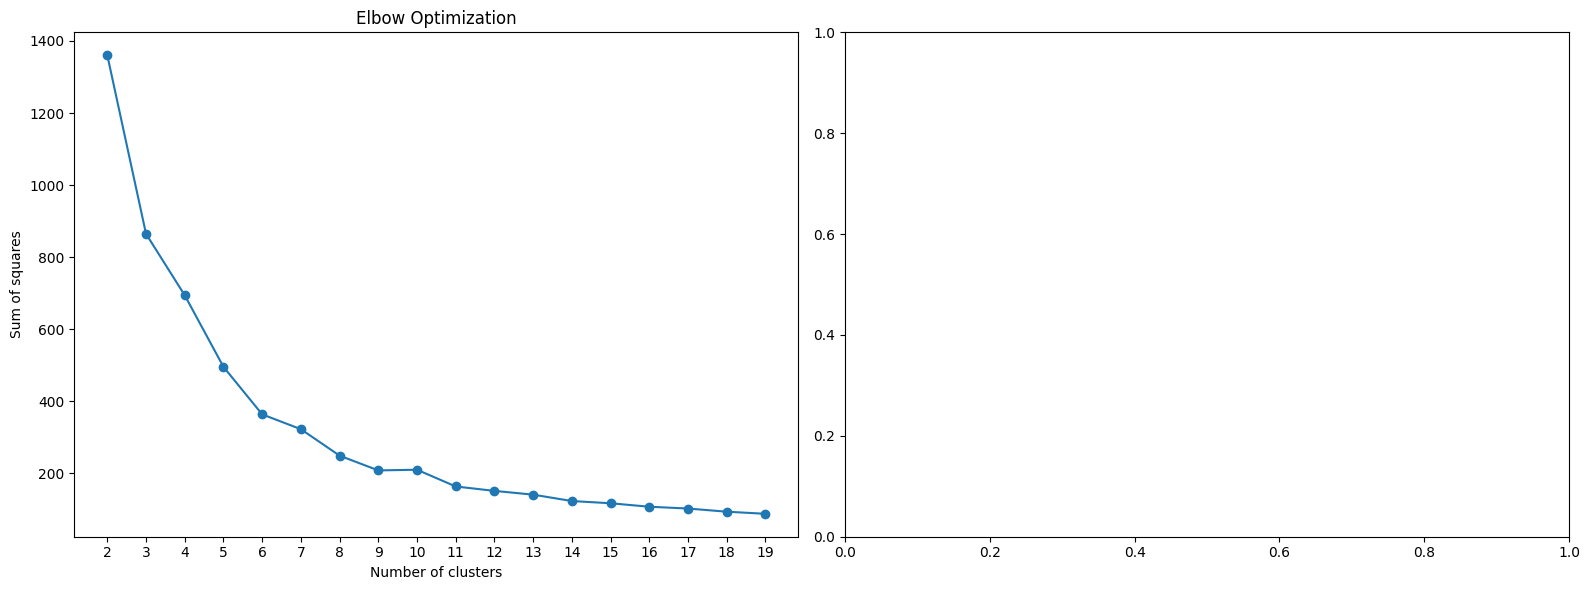

In [384]:
from sklearn.metrics import silhouette_samples, silhouette_score
#Elbow Optimization
sse = []
elbow_range = range(2,20)
for k in elbow_range:
    model = KMeans(n_clusters=k).fit(data)
    sse.append(model.inertia_)


silh_range = [2,3,4,5]
#Silhouette Optimization
silhouette = silhouette_samples(data,data['cluster'])
for j in range(k):
    i_silhouette = silhouette[data['cluster']==j].sort()
    
        
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(list(elbow_range),sse,marker='o')
ax[0].set_title('Elbow Optimization')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Sum of squares')
ax[0].set_xticks(list(elbow_range))




plt.tight_layout()
plt.show()

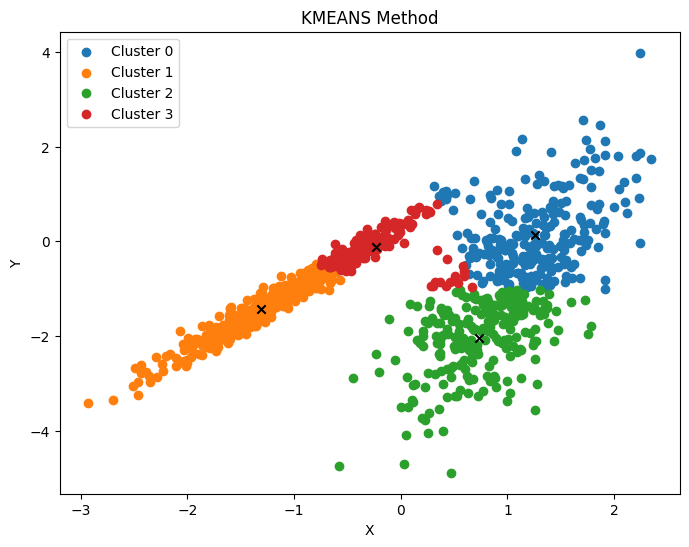

In [342]:
data = df.copy()
k = 4

kmeans = KMeans(n_clusters=k,random_state=0,n_init='auto')
kmeans.fit(data)
data['cluster'] = kmeans.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmeans.labels_):
    row = data.index[kmeans.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmeans.cluster_centers_[i][0],
                kmeans.cluster_centers_[i][1],
                color='black', marker='x')
    
plt.title('KMEANS Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

KMedoid

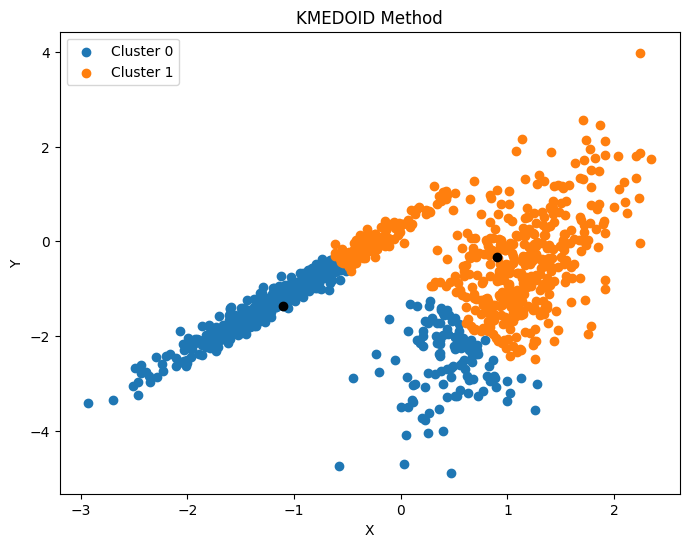

In [319]:
data = df.copy()
k = 2

kmedoid = KMedoids(n_clusters=k,random_state=0).fit(data)
data['cluster'] = kmedoid.predict(data)

plt.figure(figsize=(8, 6))

for i in np.unique(kmedoid.labels_):
    row = data.index[kmedoid.labels_ == i].tolist()
    scatter = plt.scatter(data.iloc[row,0],data.iloc[row,1],label = f'Cluster {i}')
    color = scatter.get_facecolors()[0].tolist()
    plt.scatter(kmedoid.cluster_centers_[i][0],
                kmedoid.cluster_centers_[i][1],
                color='black', marker='o')
    
plt.title('KMEDOID Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

DBSCAN

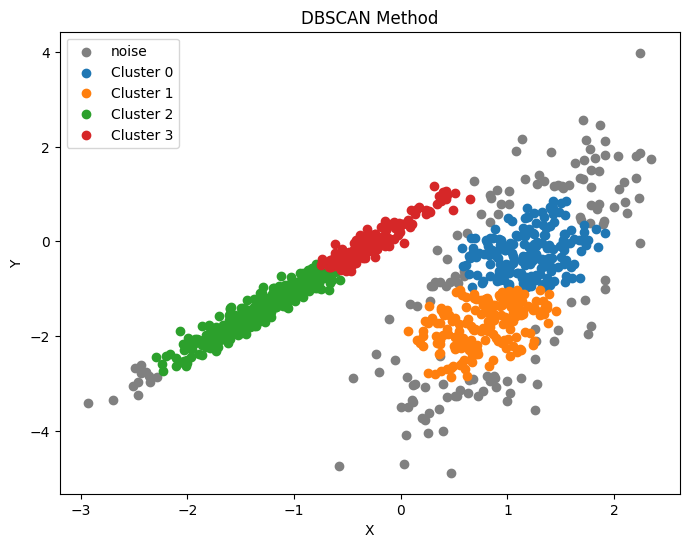

In [320]:
data = df.copy()
dbscan = DBSCAN(eps=0.2,min_samples=9).fit(data)
data['cluster'] = dbscan.fit_predict(data)

plt.figure(figsize=(8, 6))

for label in np.unique(dbscan.labels_):
    cluster_data = data[data['cluster'] == label]
    if label == -1:
        plt.scatter(cluster_data['x'],cluster_data['y'], color = 'gray', label = 'noise')
        # break
    else:
        plt.scatter(cluster_data['x'],cluster_data['y'], label = f'Cluster {label}')
        
plt.title('DBSCAN Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



BIRCH

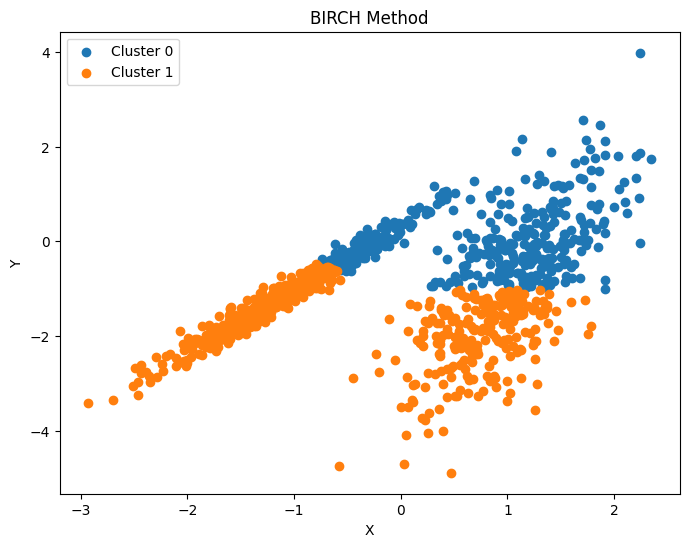

In [294]:
data = df

birch = Birch(n_clusters=2,threshold=0.5).fit(data)
data['cluster'] = birch.fit_predict(data)


plt.figure(figsize=(8, 6))

for label in np.unique(birch.labels_):
    cluster_data = data[data['cluster'] == label]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Cluster {label}')

plt.title('BIRCH Method')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()